# Init
The first thing we need to do is to import some packages

In [19]:
import urllib.request as url
import copy
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from scipy import inf
import scipy.optimize
import lmfit

# Download data
We download the data from: http://lasp.colorado.edu/lisird/data/empire_ssi/

Here, we chose to get the data from May 1st 2016.

The data is downloaded using the Python urllib and saved is a txt file

In [20]:
test = url.urlretrieve(url='http://lasp.colorado.edu/lisird/latis/dap/empire_ssi.txt?&wavelength>=115&wavelength<=160000&time~2016-04-30T22:00:00.000Z&time,irradiance,wavelength',
                       filename='data.txt')


# Import data
Here we use the numpy to import the data into an array structure.

The first column of the data is a timestamp, so we want only the second and third columns

Moreover, the data goes to very large wavelengths. So we only need some of the points

In [21]:
data = np.loadtxt('data.txt',delimiter=',') # import data
data = data[:,1:] # only second and third column

# Take only the first 800 points
end = 800
data_x = data[:end,0]
data_y = data[:end,1]

# Plot the data
Here we plot the data

Text(0,0.5,'Irradiance (W m$^{-2}$)')

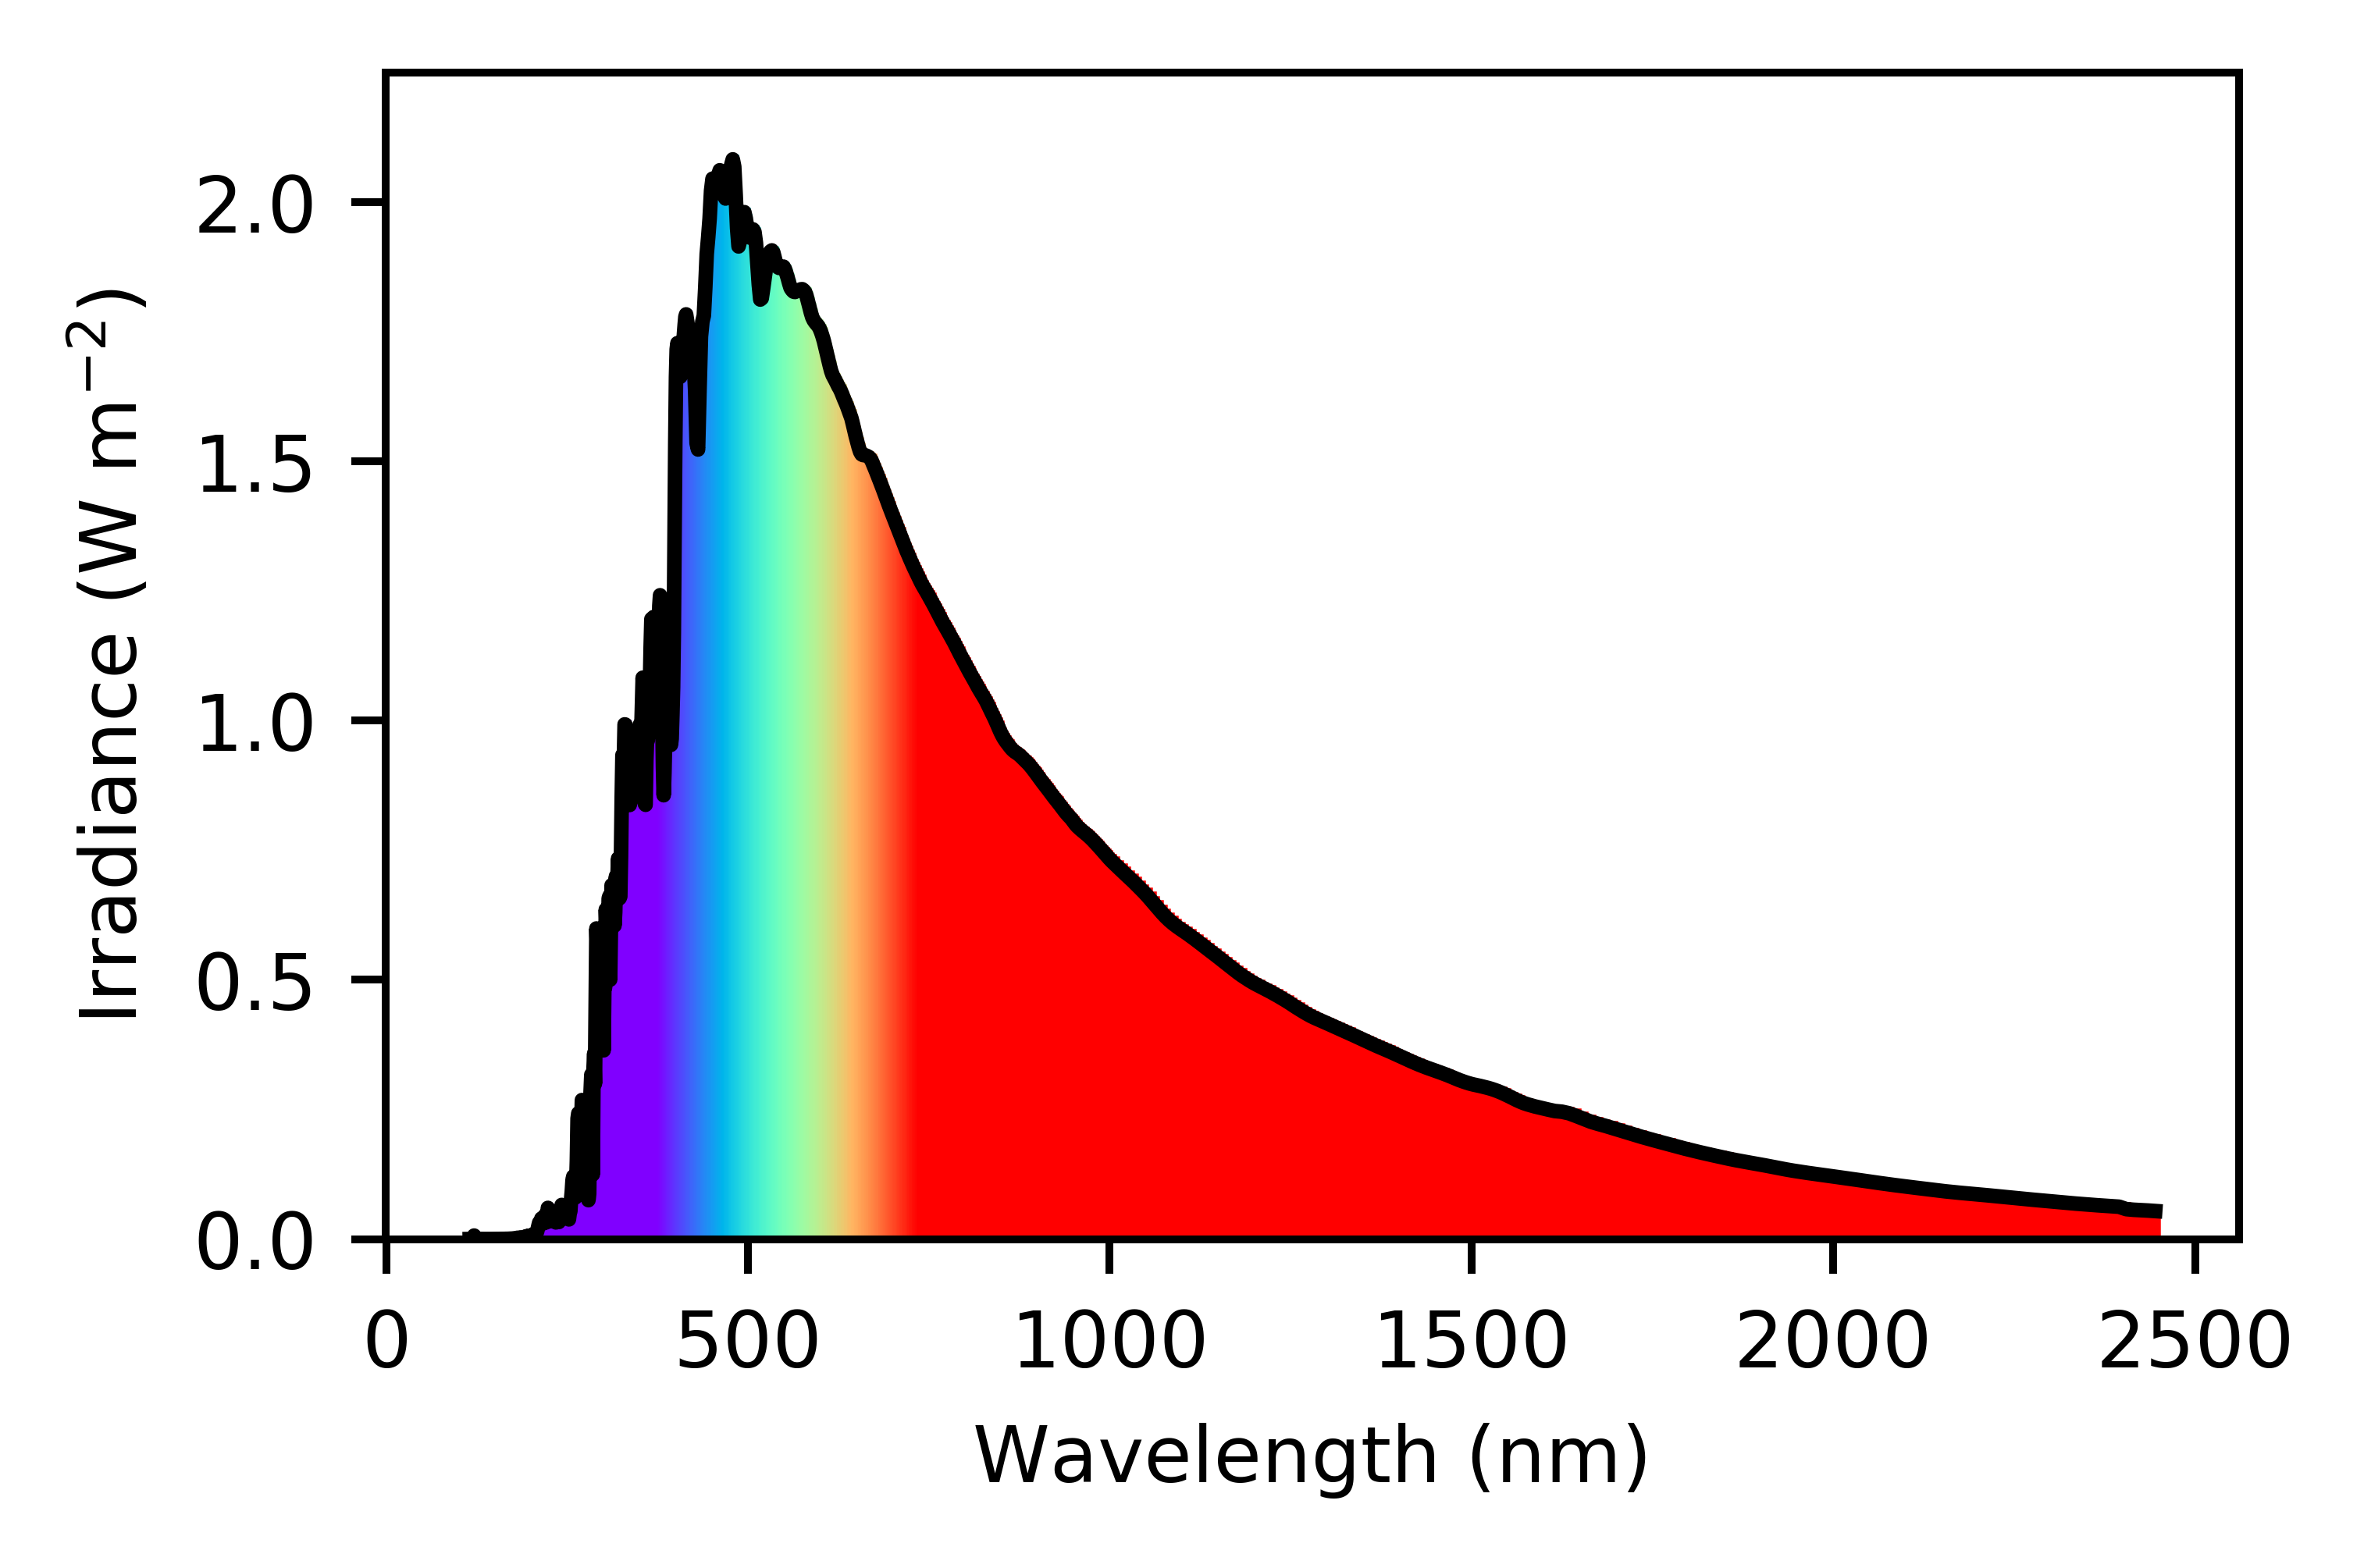

In [22]:
# Make single-column figure
fig = plt.figure(dpi=900)
fig.set_size_inches(3.40457, 2.2)

# Font size
font = {'size' : 8}
matplotlib.rc('font', **font)

# Single subplot
ax1 = fig.add_subplot(111)
ax1.plot(data_x,data_y, color='k')

# Here we define some helper function to make a spectrum
def rect(x,y,w,h,c):
    polygon = plt.Rectangle((x,y),
                            w,h,
                            color=c)
    ax1.add_patch(polygon)
def rainbow_fill(X,Y, cmap=plt.get_cmap("rainbow")):
    for n, (x,y) in enumerate(zip(X[:-1],Y[:-1])):
        dx = X[n+1]-X[n]
        c = min(max((x-380)/(740-380),0.0),1.0)
        color = cmap(c)
        rect(x,0,dx,y,color)

        
        
# Plot visible spectrum
rainbow_fill(data_x,data_y)

# Set axis limits
ax1.set_ylim(0,2.25)

# Set axis labels -- Always remember this!
ax1.set_xlabel('Wavelength (nm)')
ax1.set_ylabel(r'Irradiance (W m$^{-2}$)')

# Classical prediction
As shown in the lecture, we will arrive at an energy density

$u(\omega) \,d\omega = \frac{k_b T}{\pi^2 c^3} \omega^2 \, d\omega$

The spectral density of the light emited from the sun, $B(\omega)$ must be proportinal to the density of photons

$B(\omega) \, d\omega \propto u(\omega) \,d\omega$

You will derive this in the exercises for next week!

We can now use $\omega = 2\pi c/\lambda$, $d\omega = - \pi c / \lambda^2$ and $B(\omega)\,d\omega = -B(\lambda)\,d\lambda$ to find

$B(\lambda) \propto \frac{k_b T}{\pi^2 c^3} \frac{4 \pi^3 c^3}{\lambda^4} = \frac{4 k_b T \pi}{\lambda^4}$

In [23]:
def classical(x,temp,A):
    c = 299792458
    kb = 1.380649*10**(-23)
    
    # We include a scaling factor A
    B = A*(2*kb*temp)/(x**4)
    return B

In [24]:
# Lets make a guess 
guess_x = data_x*10**(-9) #transform to SI units
guess_y = classical(guess_x,5700,1.3*10**(-5)) #Here, I adjusted the scaling factor A by hand

Text(0,0.5,'Irradiance (W m$^{-2}$)')

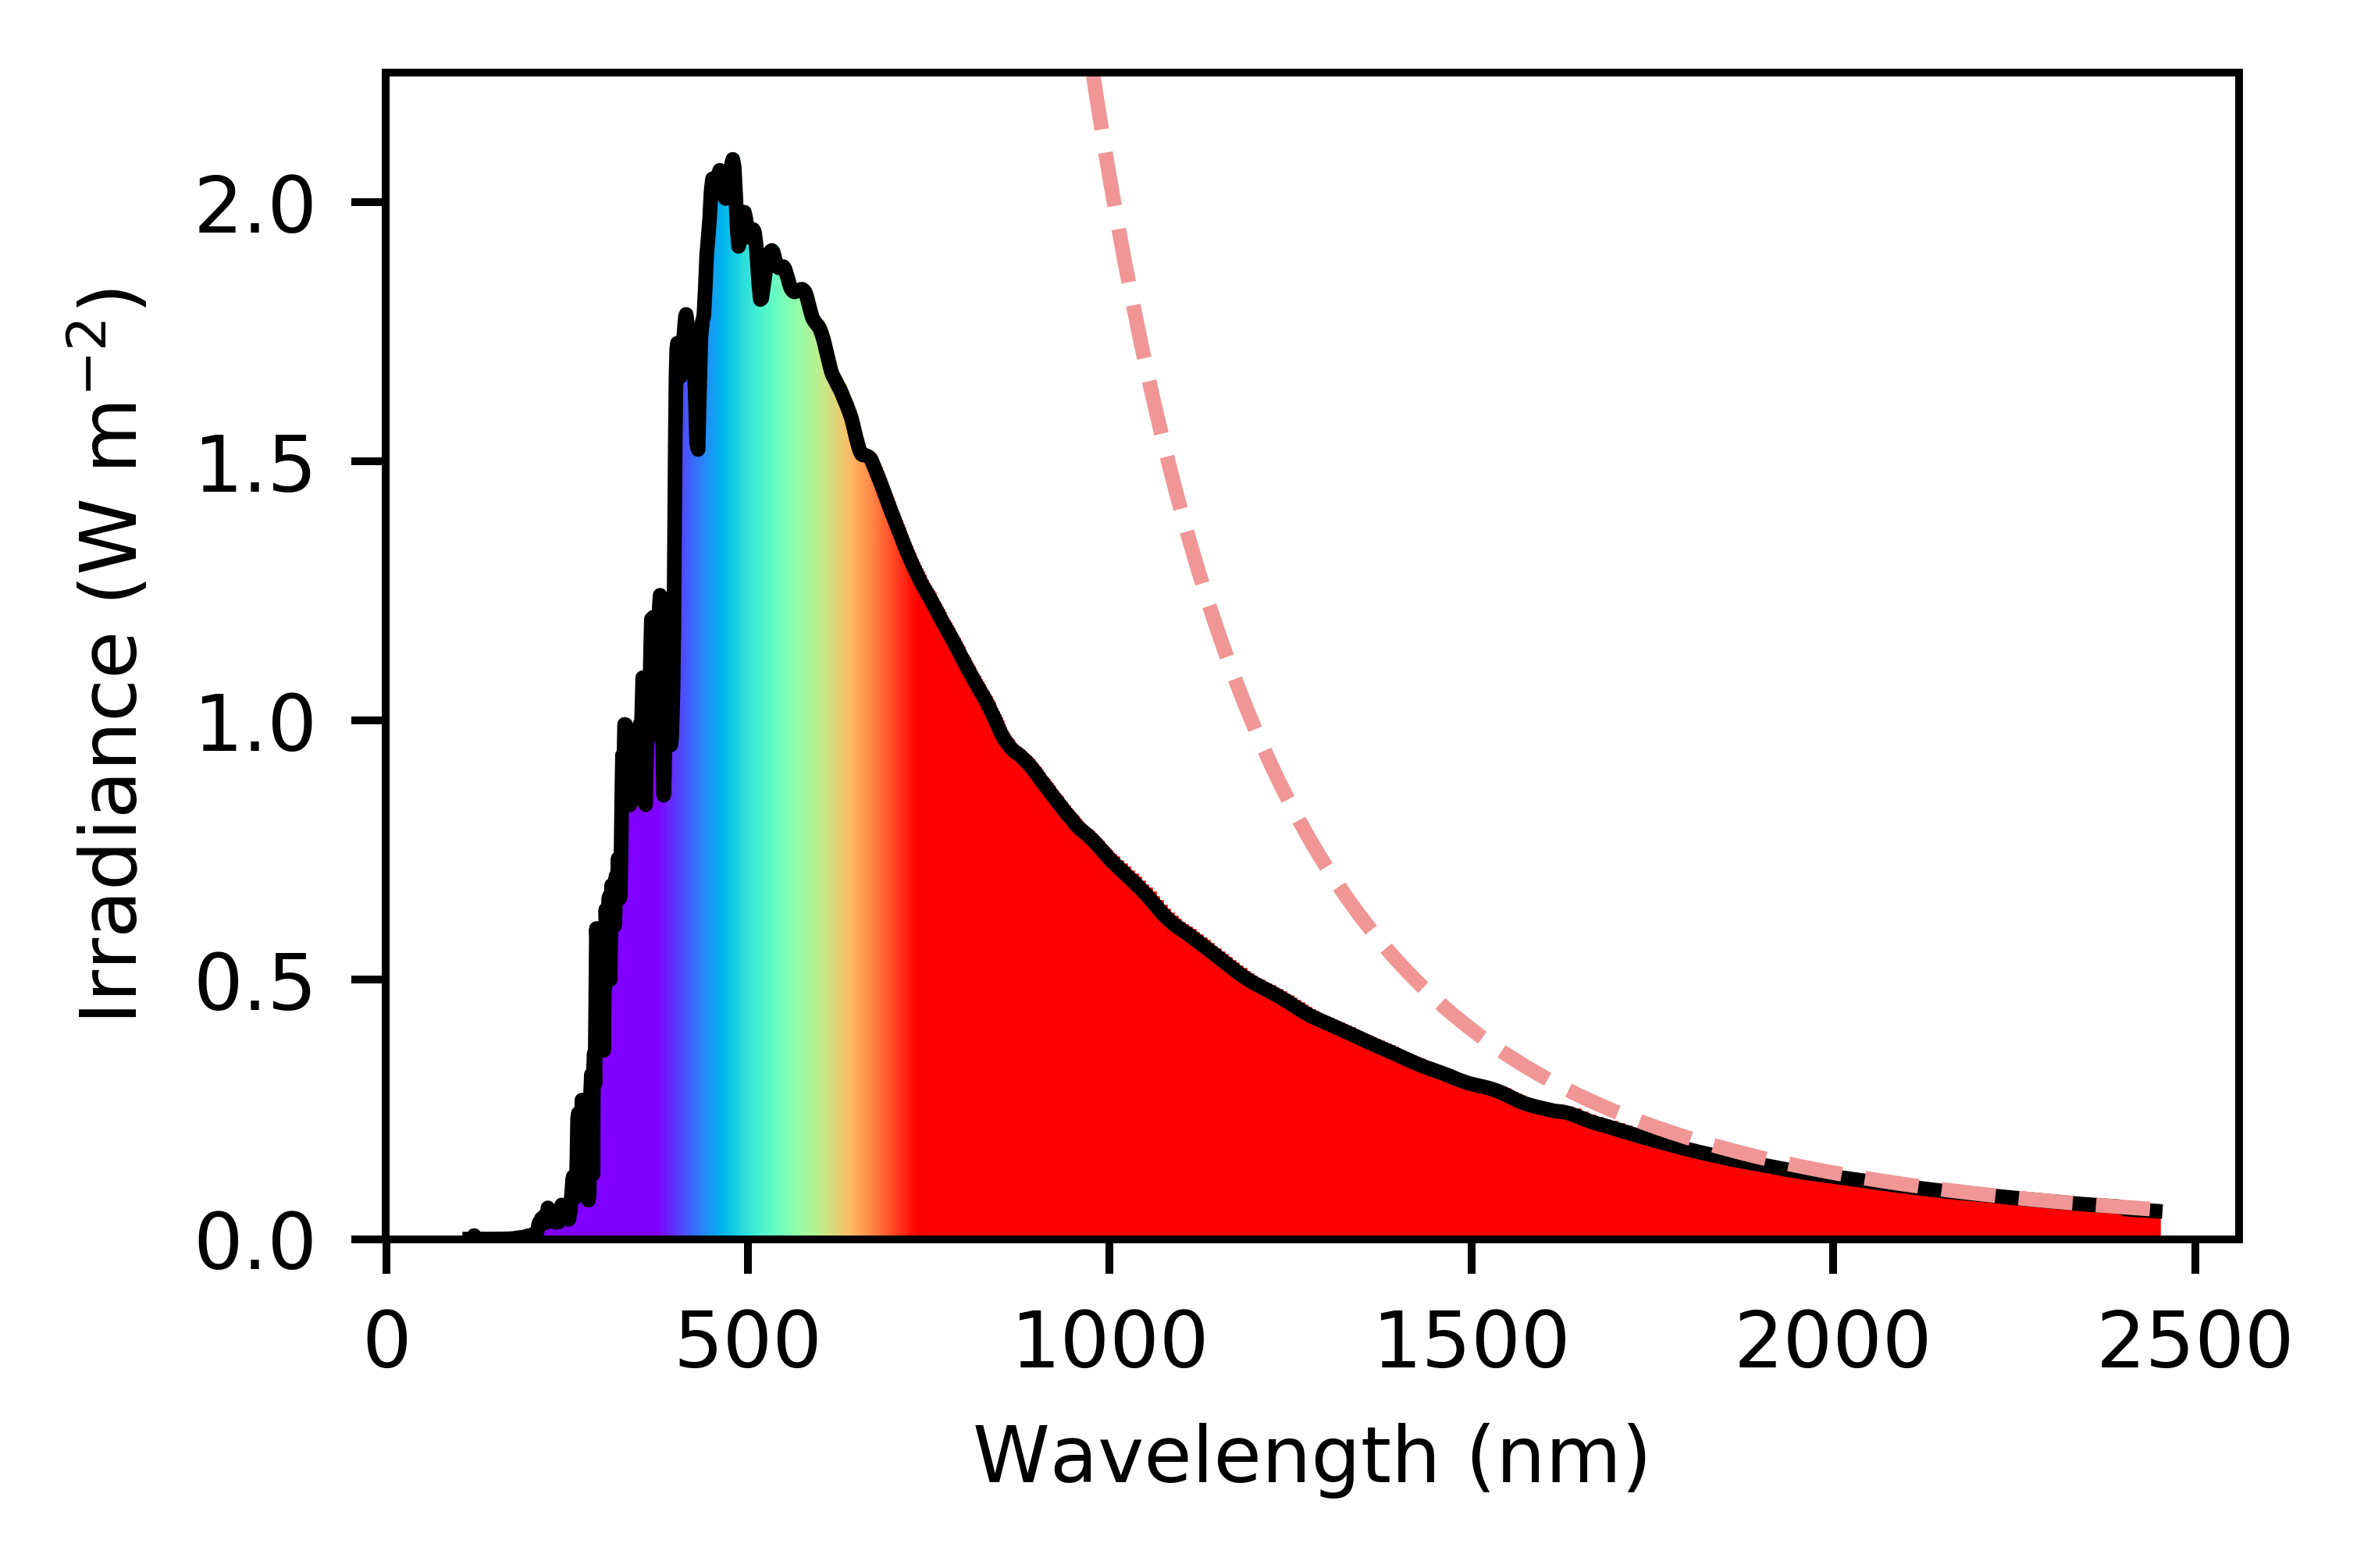

In [25]:
fig = plt.figure(dpi=900)
fig.set_size_inches(3.40457, 2.2) #Second number can be adjusted for height

# Prepare subplots with a good distance between each plot
fig.subplots_adjust(wspace=0.01,hspace=0.2)

# Font size
font = {'size' : 8}
matplotlib.rc('font', **font)

ax1 = fig.add_subplot(111)
ax1.plot(data_x,data_y, color='k')
ax1.plot(data_x,guess_y, '--', color=(240/255,150/255,150/255))
rainbow_fill(data_x,data_y)

ax1.set_ylim(0,2.25)

ax1.set_xlabel('Wavelength (nm)')
ax1.set_ylabel(r'Irradiance (W m$^{-2}$)')

It is literally a catastrophe!!

We can look a bit closer at large wave-lengths:

In [26]:
# Take only the first 1000 points
end_ir = 1000
data_ir_x = data[:end_ir,0]
data_ir_y = data[:end_ir,1]

In [27]:
guess_ir_x = data_ir_x*10**(-9) #transform to SI units
guess_ir_y = classical(guess_ir_x,5700,1.3*10**(-5)) #Here, I adjusted the scaling factor A by hand

Text(0,0.5,'Irradiance (W m$^{-2}$)')

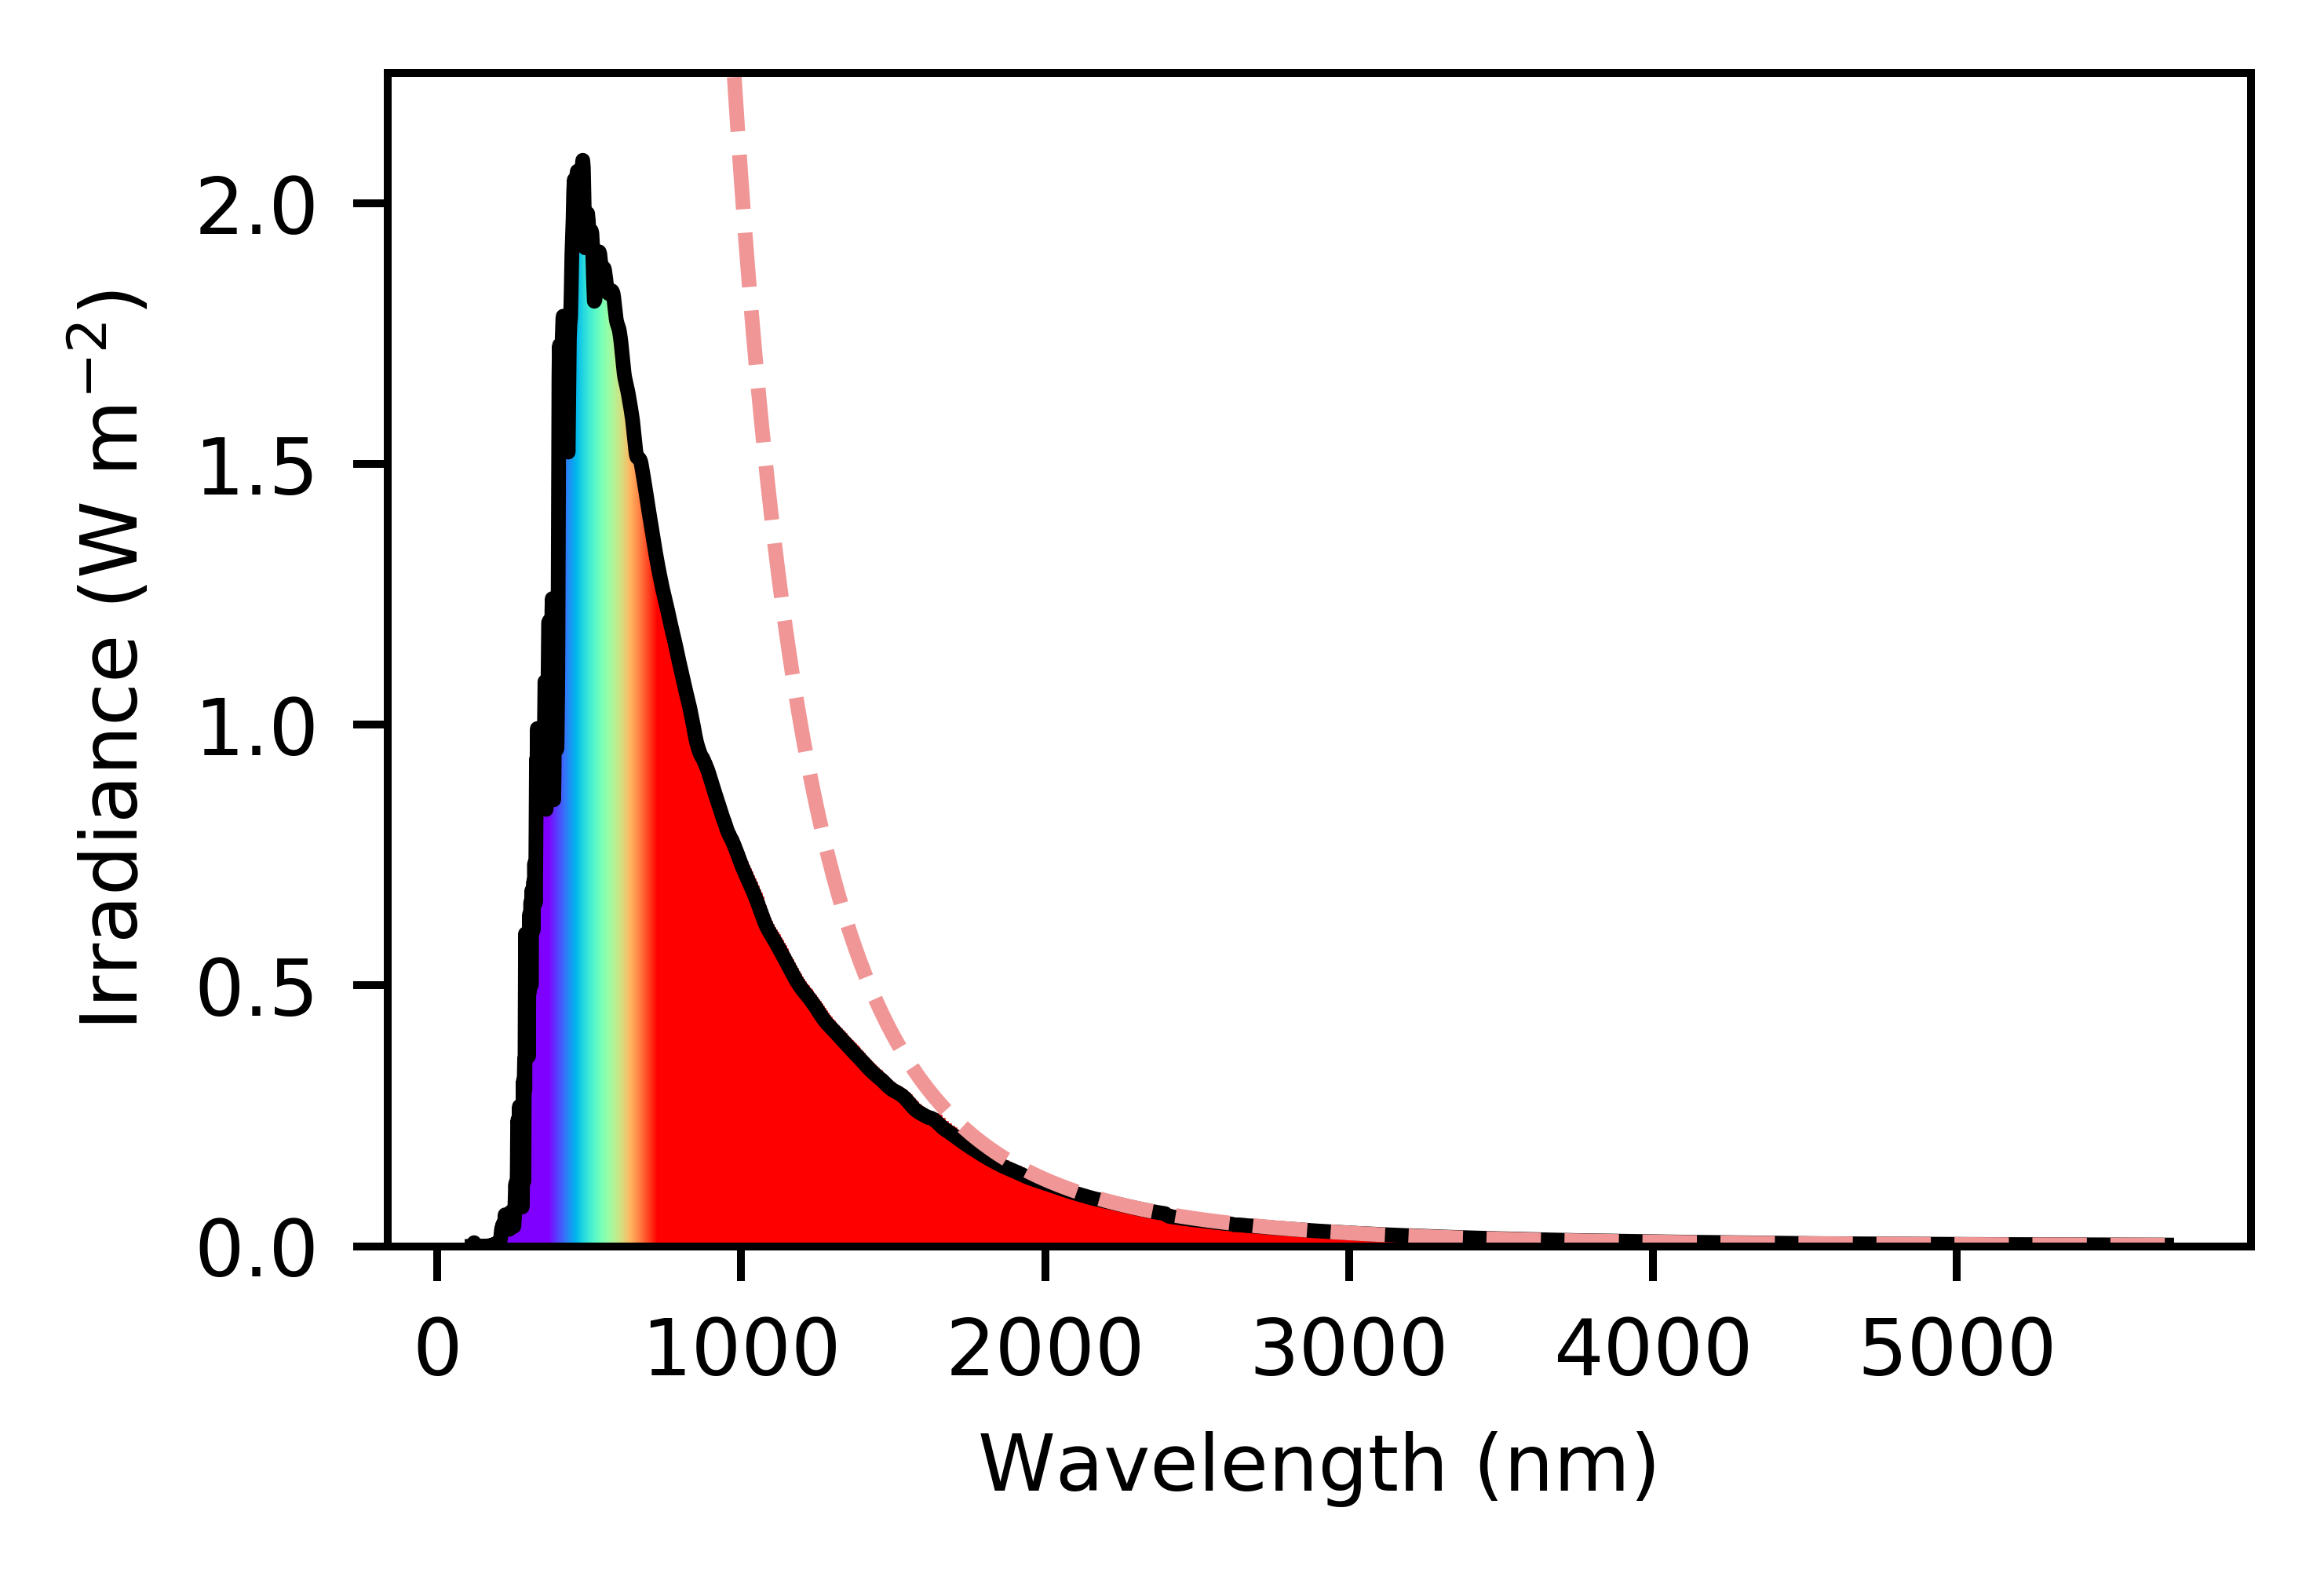

In [28]:
fig = plt.figure(dpi=900)
fig.set_size_inches(3.40457, 2.2) #Second number can be adjusted for height

# Prepare subplots with a good distance between each plot
fig.subplots_adjust(wspace=0.01,hspace=0.2)

# Font size
font = {'size' : 8}
matplotlib.rc('font', **font)

ax1 = fig.add_subplot(111)
ax1.plot(data_ir_x,data_ir_y, color='k')
ax1.plot(data_ir_x,guess_ir_y, '--', color=(240/255,150/255,150/255))
rainbow_fill(data_ir_x,data_ir_y)

ax1.set_ylim(0,2.25)

ax1.set_xlabel('Wavelength (nm)')
ax1.set_ylabel(r'Irradiance (W m$^{-2}$)')

We can barely see what is going on at larger wavelengths, so we go to a log-plot

/Users/Eliska/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:3449: UserWarning: Attempted to set non-positive ylimits for log-scale axis; invalid limits will be ignored.
  'Attempted to set non-positive ylimits for log-scale axis; '


Text(0,0.5,'Irradiance (W m$^{-2}$)')

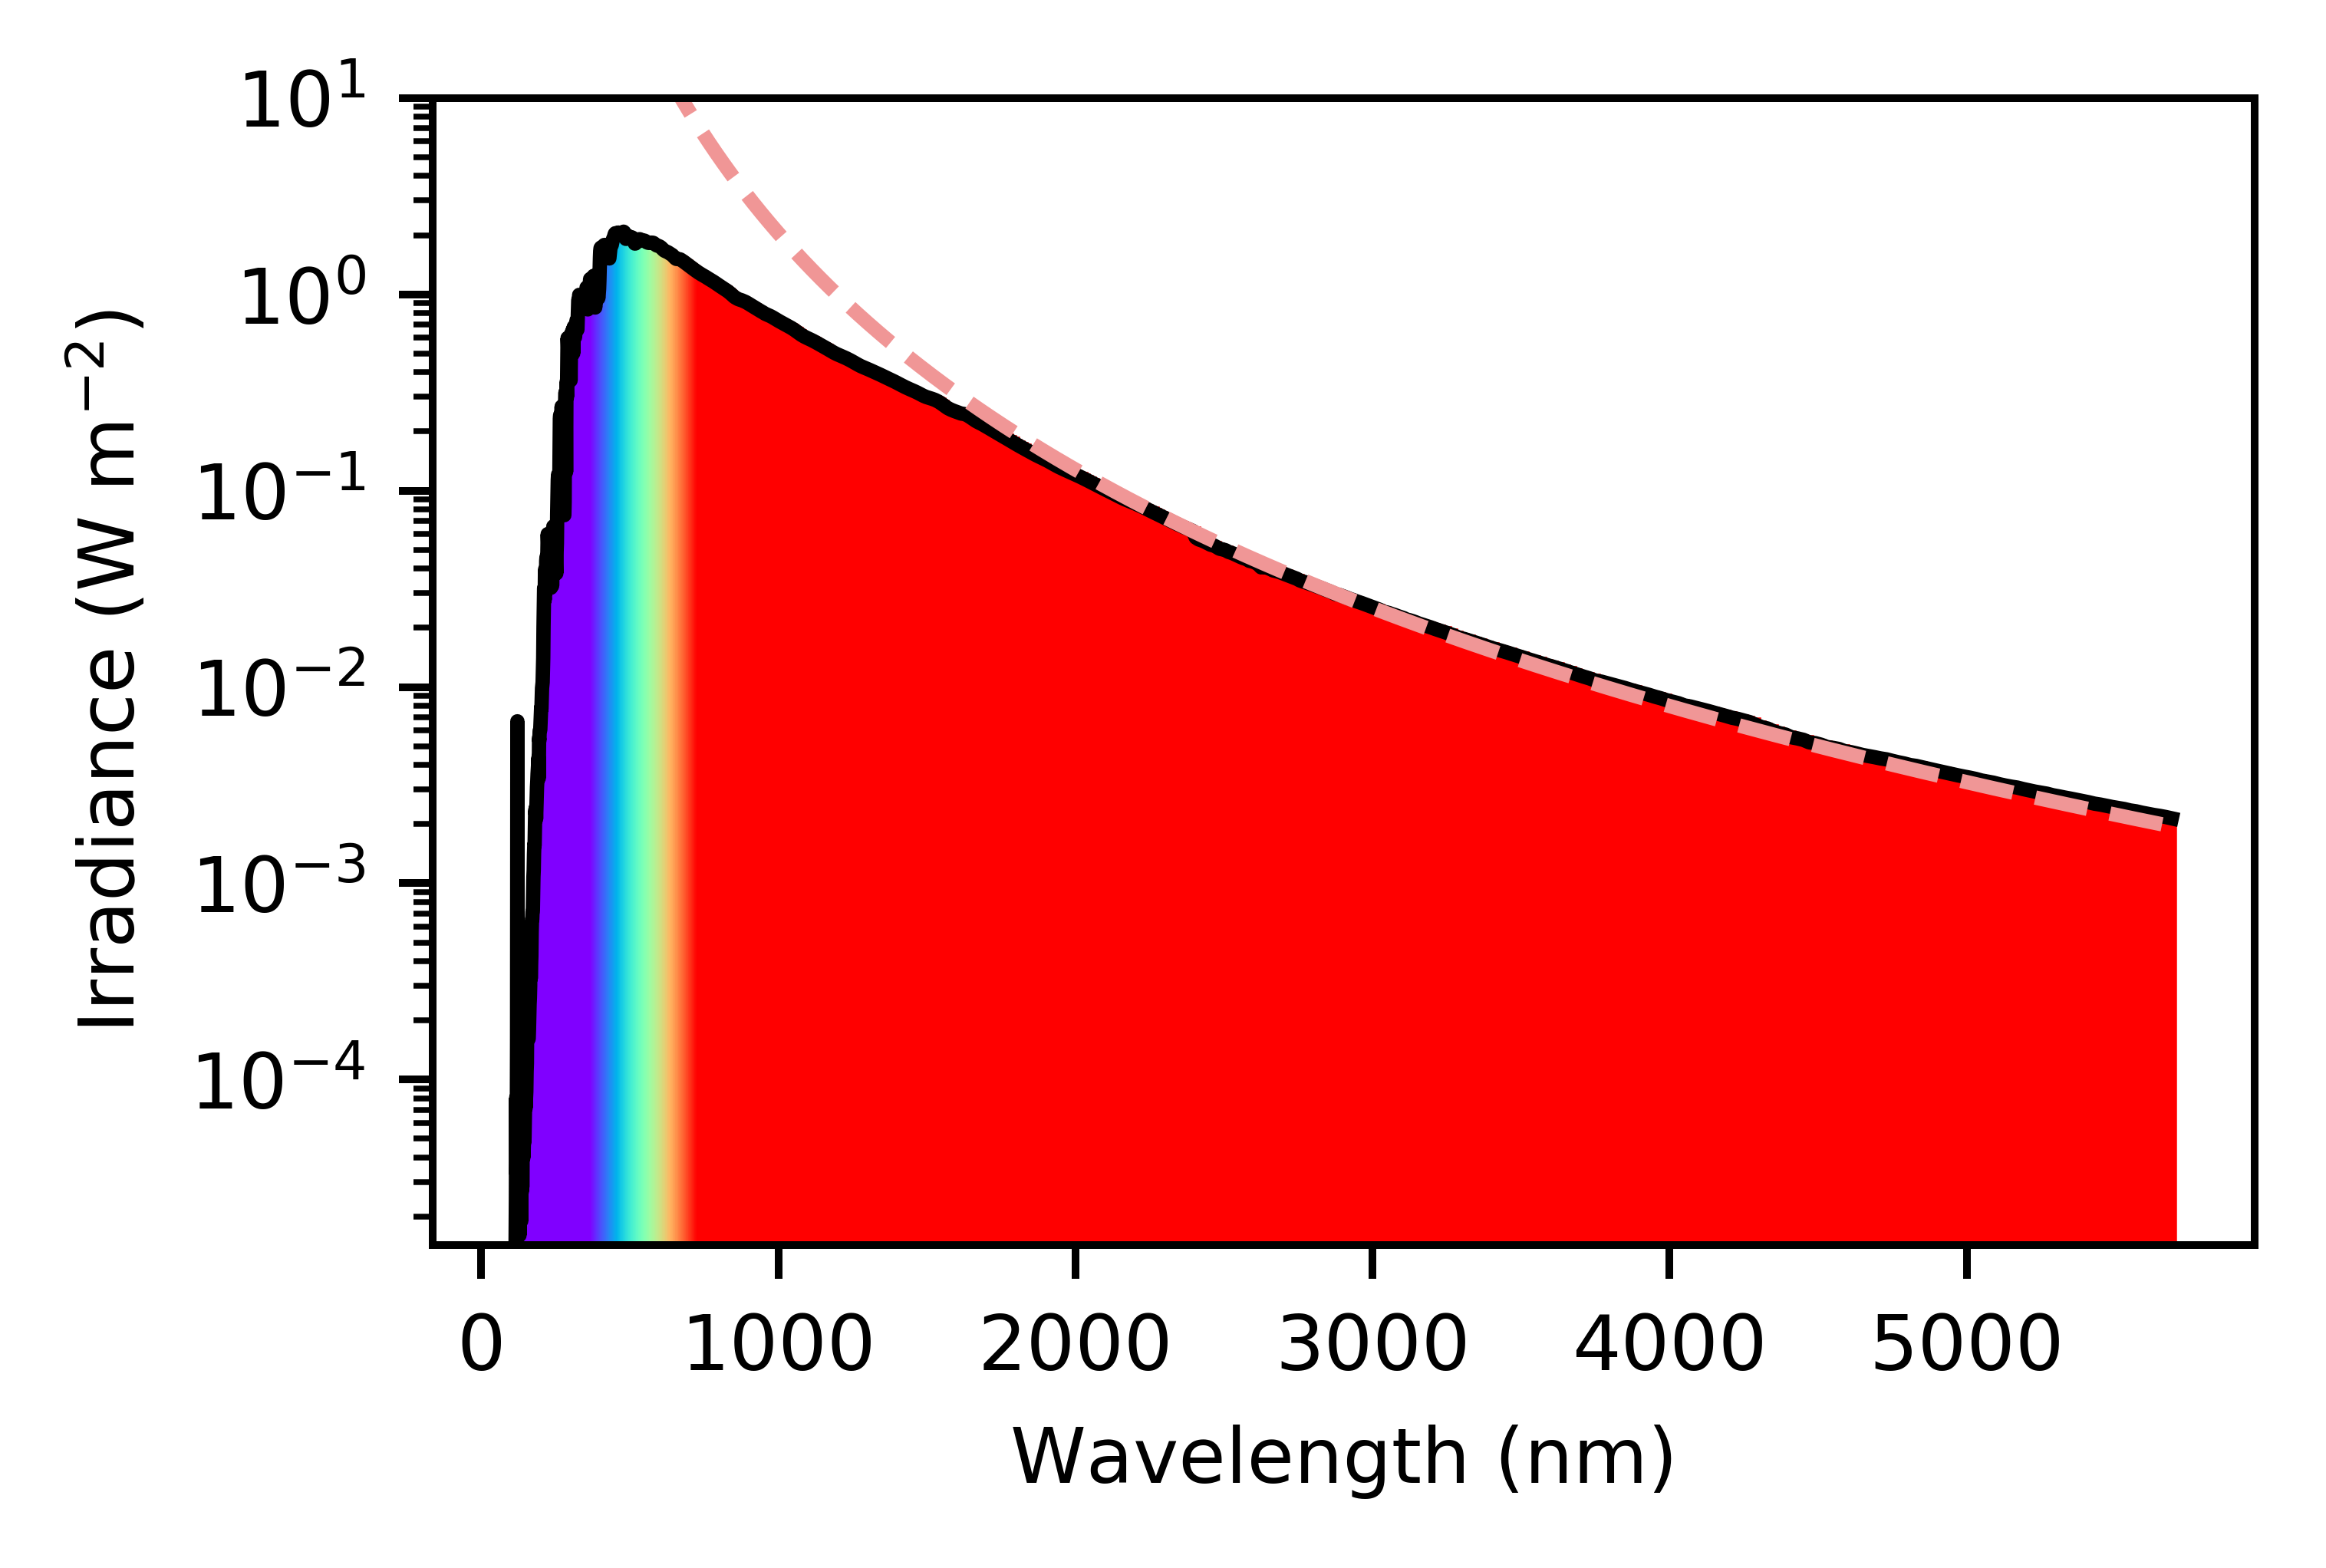

In [29]:
fig = plt.figure(dpi=900)
fig.set_size_inches(3.40457, 2.2) #Second number can be adjusted for height

# Prepare subplots with a good distance between each plot
fig.subplots_adjust(wspace=0.01,hspace=0.2)

# Font size
font = {'size' : 8}
matplotlib.rc('font', **font)

ax1 = fig.add_subplot(111)
ax1.plot(data_ir_x,data_ir_y, color='k')
ax1.plot(data_ir_x,guess_ir_y, '--', color=(240/255,150/255,150/255))
rainbow_fill(data_ir_x,data_ir_y)

ax1.set_yscale('log')
ax1.set_ylim(0,10)

ax1.set_xlabel('Wavelength (nm)')
ax1.set_ylabel(r'Irradiance (W m$^{-2}$)')

# Plot Planck's law
Here we first define Plancks law as

$B = \frac{2hc^2}{\lambda^5} \Big( \, \text{exp}(hc/\lambda k_b T) -1 \Big)^{-1} $

In [30]:
def planck(x,temp,A):
    h = 6.62607015*10**(-34)
    c = 299792458
    kb = 1.380649*10**(-23)
    
    # We include a scaling factor A here, why?
    B = A*(2*h*c**2)/(x**5)/(np.exp(h*c/(x*kb*temp))-1)
    return B

In [31]:
# Lets make a guess 
guess_x = data_x*10**(-9) #transform to SI units
guess_y = planck(guess_x,5700,0.078*10**(-12)) #Here, I adjusted the scaling factor A by hand

Text(0,0.5,'Irradiance (W m$^{-2}$)')

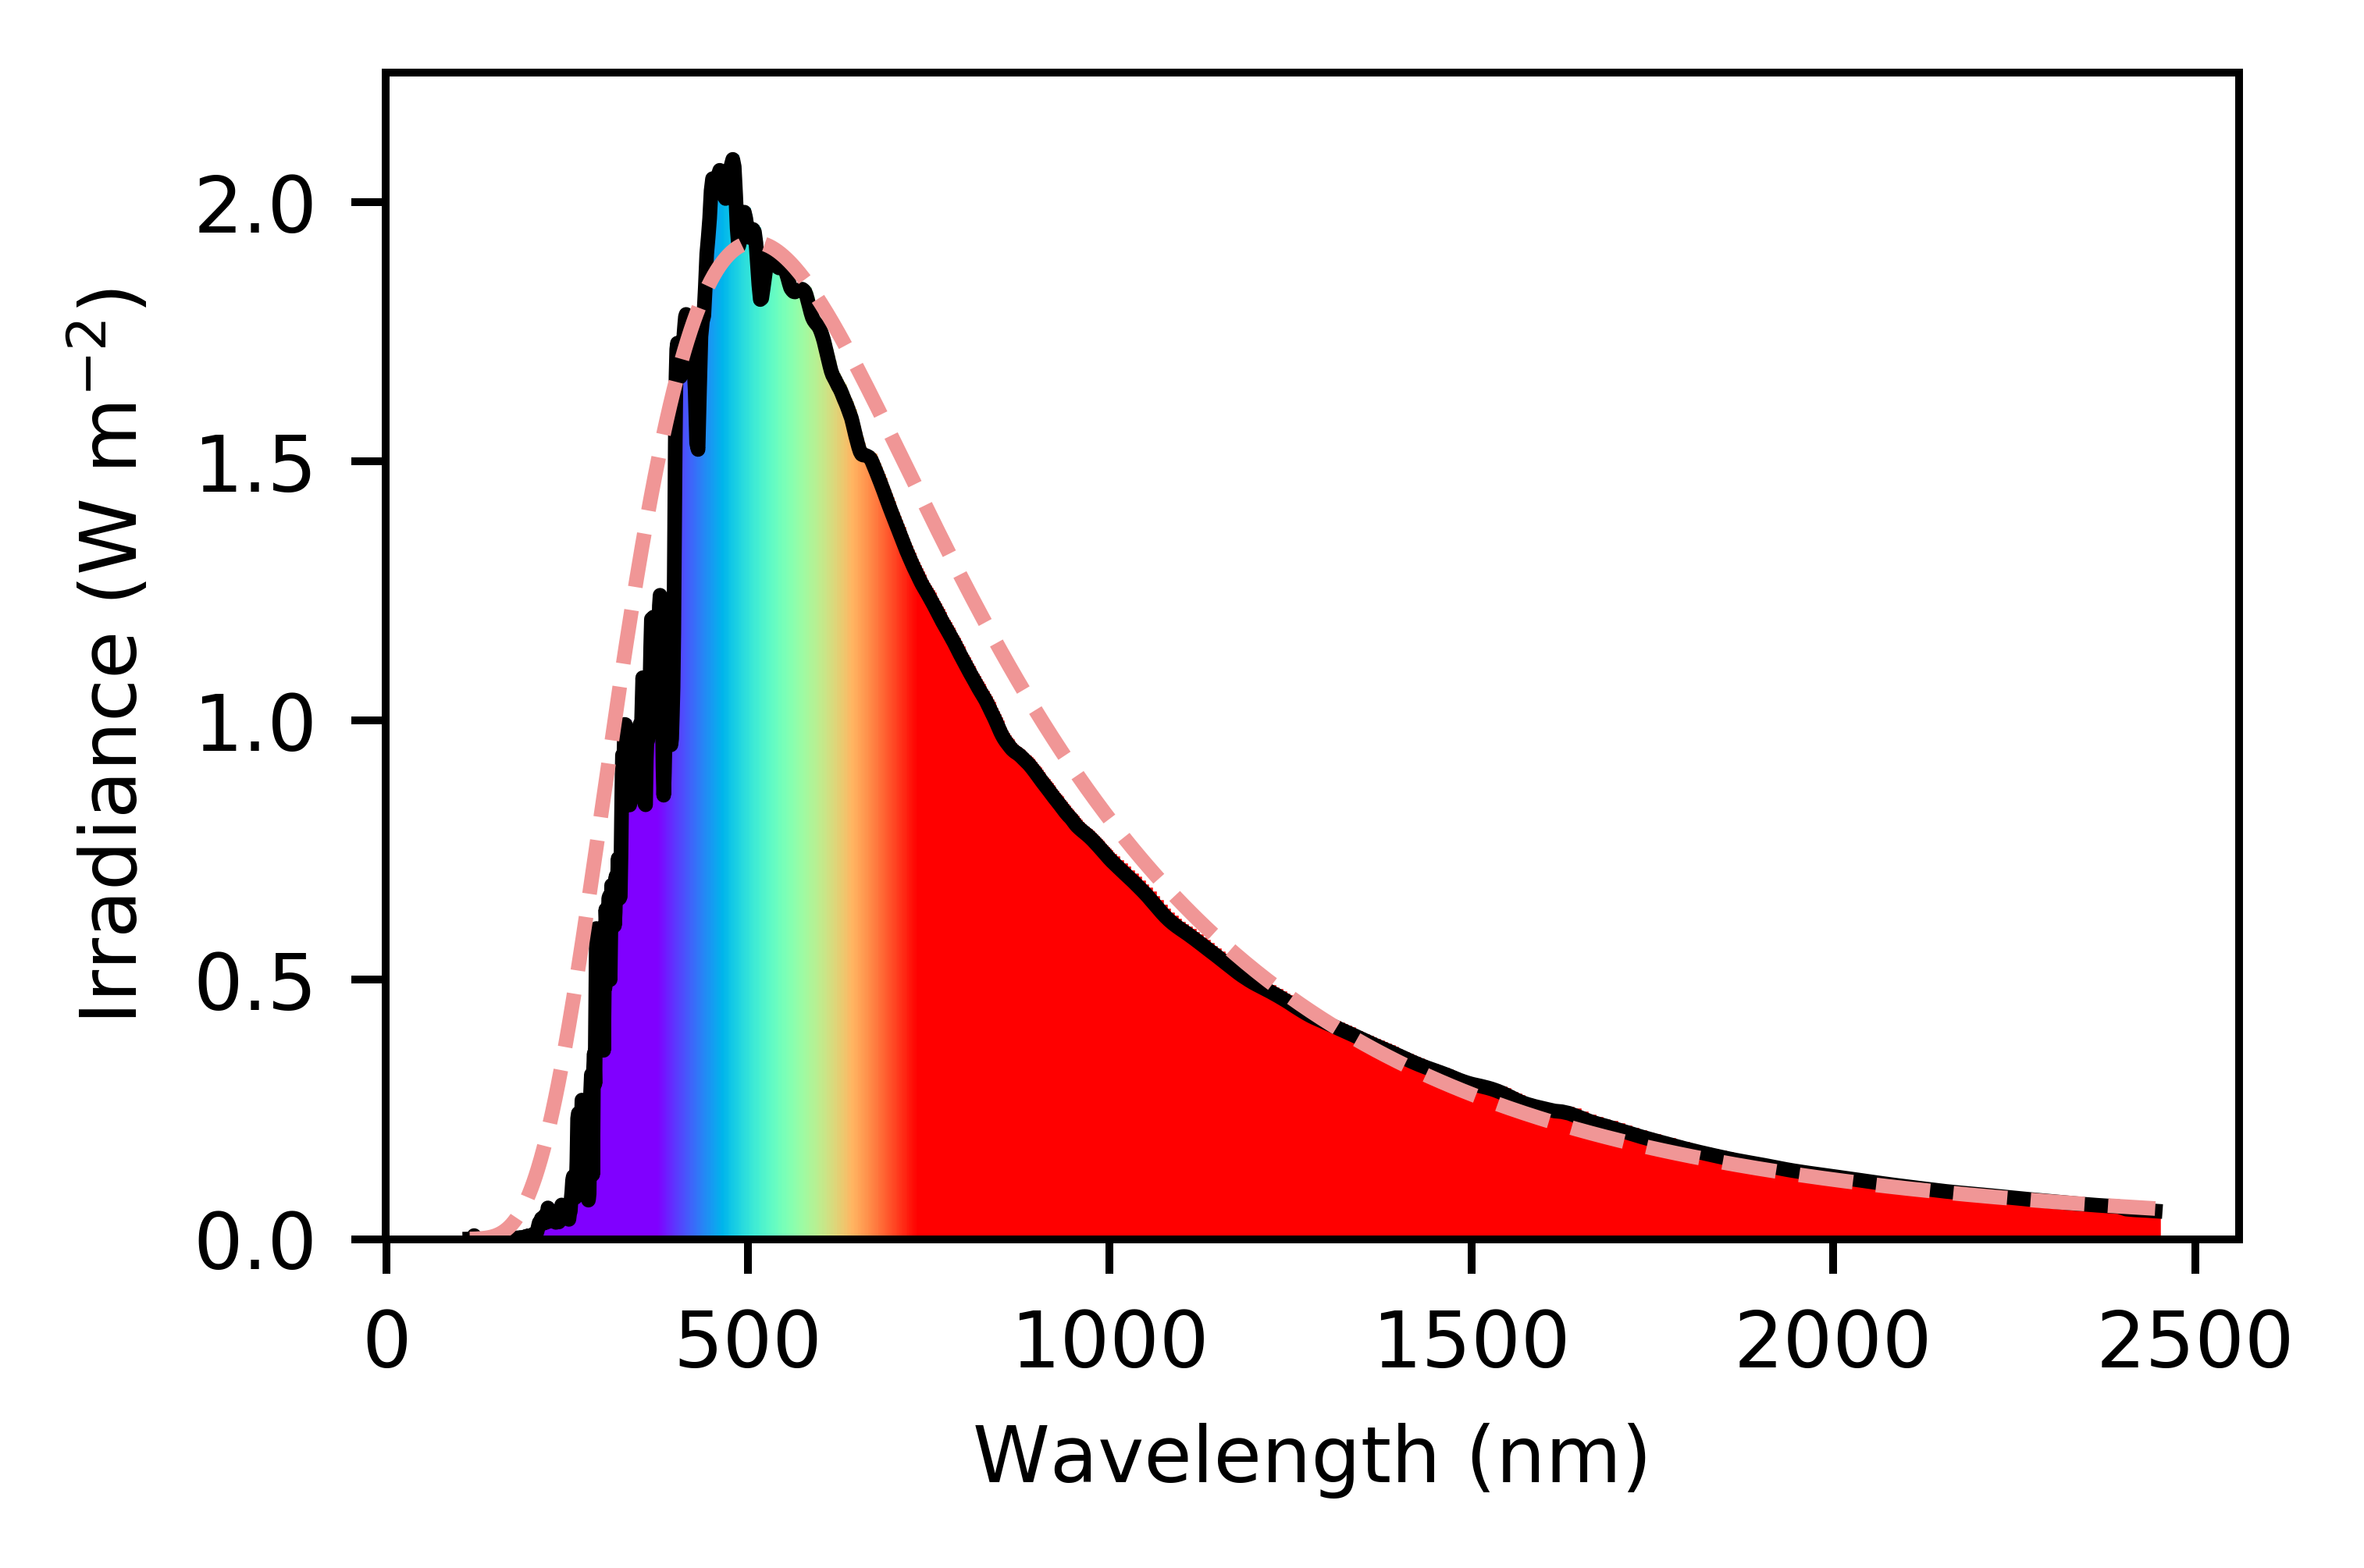

In [32]:
fig = plt.figure(dpi=900)
fig.set_size_inches(3.40457, 2.2) #Second number can be adjusted for height

# Prepare subplots with a good distance between each plot
fig.subplots_adjust(wspace=0.01,hspace=0.2)

# Font size
font = {'size' : 8}
matplotlib.rc('font', **font)

ax1 = fig.add_subplot(111)
ax1.plot(data_x,data_y, color='k')
ax1.plot(data_x,guess_y, '--', color=(240/255,150/255,150/255))
rainbow_fill(data_x,data_y)

ax1.set_ylim(0,2.25)

ax1.set_xlabel('Wavelength (nm)')
ax1.set_ylabel(r'Irradiance (W m$^{-2}$)')

Looks very good :-)

# Fit with lmfit

In [33]:
xfit = data_x*10**(-9) #transform to SI units
yfit = data_y

In [34]:
def lmfit_planck(params, x, ydata):
    temp = params['temp'].value
    A = params['A'].value
    
    h = 6.62607015*10**(-34)
    c = 299792458
    kb = 1.380649*10**(-23)

    y_model = A*(2*h*c**2)/(x**5)/(np.exp(h*c/(x*kb*temp))-1)*10**(-12)
    return y_model - ydata


params = lmfit.Parameters()
params.add('A', 0.15, min=0.01, max=10.0)
params.add('temp', 5000, min=100, max=10000.0)

In [35]:
o1 = lmfit.minimize(lmfit_planck, params, args=(xfit[:], yfit[:]), method='leastsq')
print("Temperature of the Sun according to fit:")
print(int(round(o1.params['temp'].value)), 'Kelvin')

Temperature of the Sun according to fit:
5445 Kelvin


Finally we can plot the fit on top of the data

In [36]:
fitout = lmfit_planck(o1.params,xfit,0)

Text(0,0.5,'Irradiance (W m$^{-2}$)')

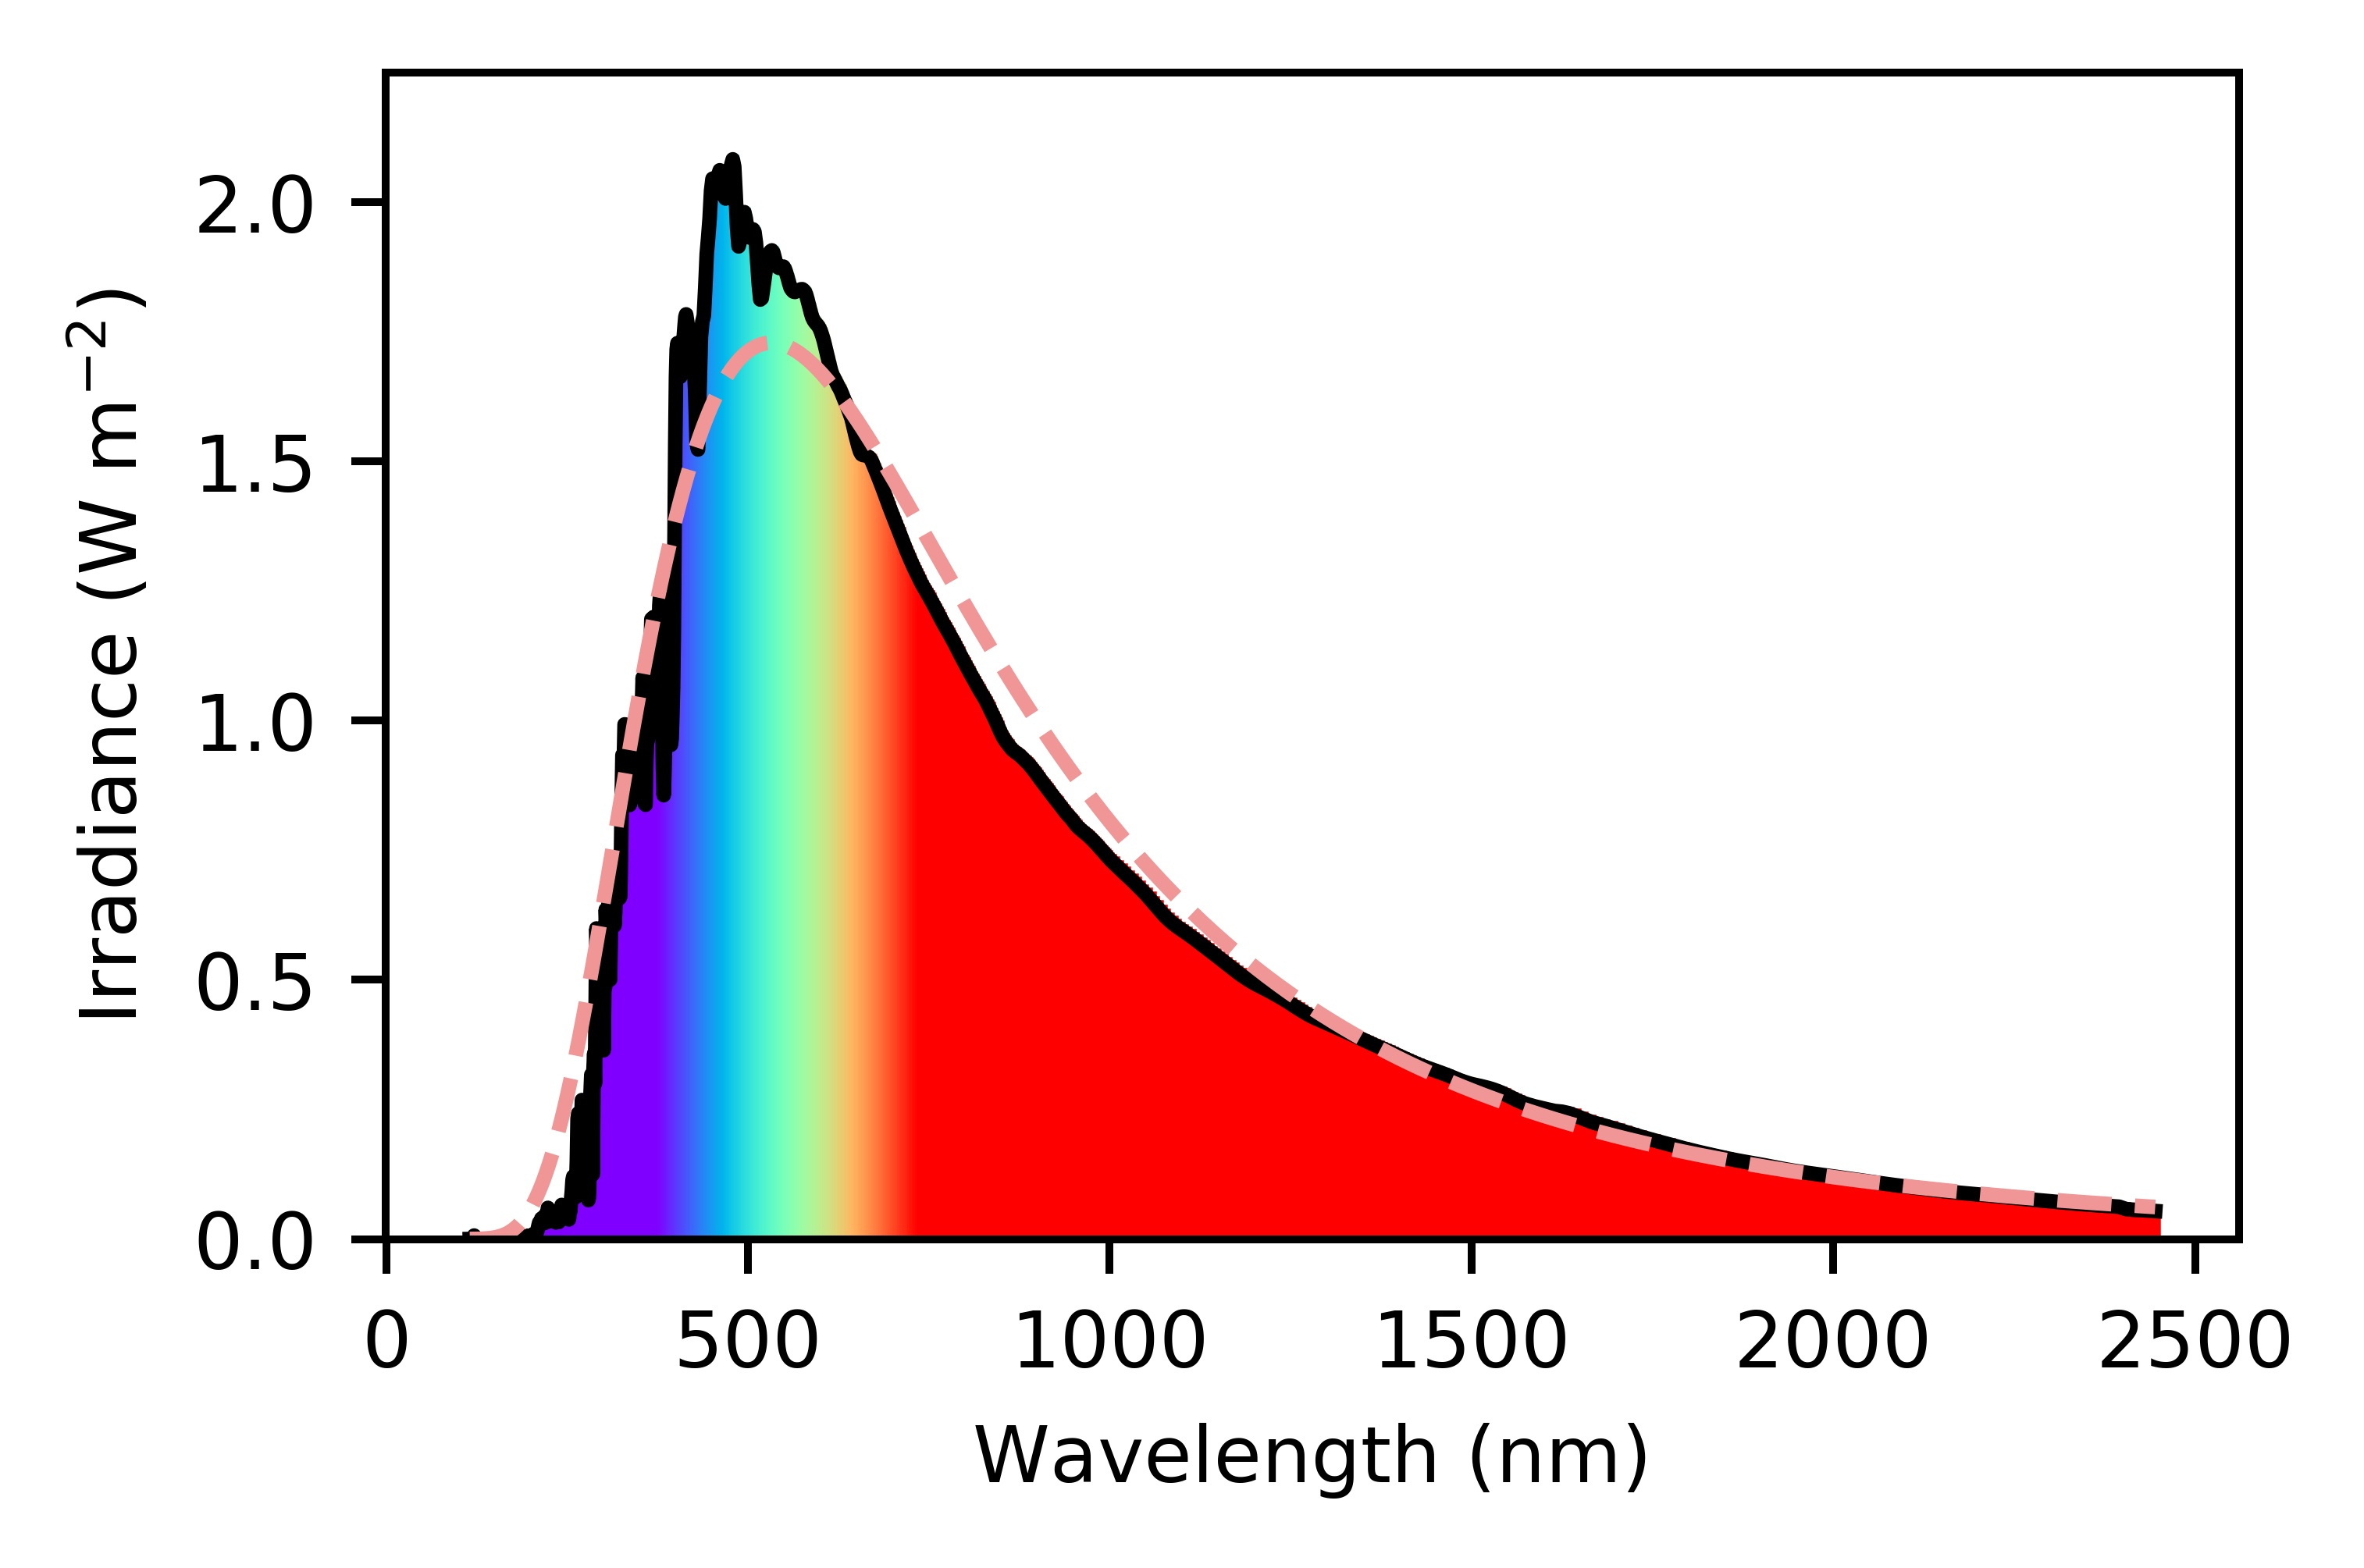

In [37]:
fig = plt.figure(dpi=900)
fig.set_size_inches(3.40457, 2.2) #Second number can be adjusted for height

# Prepare subplots with a good distance between each plot
fig.subplots_adjust(wspace=0.01,hspace=0.2)

# Font size
font = {'size' : 8}
matplotlib.rc('font', **font)

ax1 = fig.add_subplot(111)
ax1.plot(data_x,data_y, color='k')
ax1.plot(data_x,fitout, '--', color=(240/255,150/255,150/255))
rainbow_fill(data_x,data_y)

ax1.set_ylim(0,2.25)

ax1.set_xlabel('Wavelength (nm)')
ax1.set_ylabel(r'Irradiance (W m$^{-2}$)')